CS 636 Midterm Project:
Venkatesh Kunduru
Srikar Nalluri

## Midterm project: Equity Portfolio Management

### Data Preparation

Download the historial daily data of the entire 2018 for the 10 stocks 

```python
universe = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'TSLA', 'ORCL', 'SAP']
```

For example, to download IBM data, use the following link to go to yahoo finance page. Find the "Download Data" link to download the csv file to you local disk.
https://finance.yahoo.com/quote/IBM/history?period1=1514782800&period2=1546232400&interval=1d&filter=history&frequency=1d

Replace "IBM" with other stock symbol in the above URL, you will be able to download data for other 9 stocks.

You should have 10 csv files on your disk now. IBM.csv, MSFT.csv, etc. We call the 10 stocks "universe" which is the entire stock market you can trade.

### Retrieve the "Close" and "Adj Close" values for each stock

You will create a dataframe where there are 20 columns for the 10 stocks, each row is the "Close" and "Adj Close" prices for the 10 stocks on each day, in the order of the business days in 2018. Assume all buy/sell on the "Close" prices and there is no transaction cost.

### You start to manage 5 million dollars fund on Jan 02, 2018

You have a strategy to manage the fund.

1. On Jan 02 2018, you split the \\$5m into 5 \\$1m, and use them to buy 5 stocks from the 10 stocks. For example, IBM close price was \\$154.25. With \\$1m, you can buy max 6482 shares with cost \\$999848.5 with \\$151.5‬ cash left. You decided to spend \\$1m on each of ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN'] respectively and keep the rest cash into a zero-interest cash account. On Jan 02 2018, your mark to market value (MTM) is \\$5m if combining all stocks value and cash. Your holdings of stocks and cach account is your portfolio.

\begin{equation*}
\ MTM^t =  cash^t + \sum_{k=1}^5 Shares_k^t \times ClosePrice_k^t \
\end{equation*}


2. Your trading strategy is "5 days rebalancing of buying low". Here is how it works. You keep your portfolio unchanged until 5 days later on Jan 09 2018. Now you want to re-check the market and adjust your portfolio. You will compute the "Adj Close" price changes from Jan 02 to Jan 09, and find the 5 stocks whose "Adj Close" prices dropped the most in terms of percentage. You sell all current holdings on Jan 09 "Close" prices to convert your portfolio to all cash. Then immediately split your cash, including your cash account, to 5 equal parts to buy the 5 stocks that dropped the most from Jan 02 to Jan 09 on 'Adj Close' prices. You always buy the max shares of stock on the "Close" price and keep the rest cash in cash account. Now the portfolio should be different from 5 days ago. This operation is called "rebalancing".

    Keep in mind, the MTM will change every day, even when your portfolio holdings don't change, because the stock prices change.


3. Corporations generally issue stock dividends on some days. The total dividend you get on such a day is the stock dividend  times your shares if you have shares of this stock on the dividend day. If you buy shares on the dividend day, these bought shares are not qualified to get dividend. If you sell shares on the dividend day, the sold shares are qualified to get dividend. For example, on 2/8/2018, IBM issued \$1.5 dividend per share. In your cash account, you will automatically get

\begin{equation*}
\$1.5 \times \left(your\ IBM\ shares\ on\ 2/8/2018\right)
\end{equation*} 



4. 5 business days later on Jan 17 (Jan 15 was a holiday), you re-check the market and adjust your portfolio again. You will have a new portfolio on Jan 17.


5. If you run this strategy every 5 days all the way to Dec 31 2018, you will have a daily MTM. You expect the MTM on Dec 31 2018 should be higher than \$5m because you always buy the stocks that dropped the most, i.e., you always buy low.


6. Another strategy is "5 days rebalancing of buying high". You always buy the 5 stocks whose "Adj Close" prices surge the most in terms of percentage because you believe the trend will continue. Run the new strategy and see how the MTM will change.


7. You will create a "high tech index" which is simply the daily average of the 10 stocks "Close" prices. Compare your MTM series with the "high tech index" and plot their curves. To plot the two curves together, you may want to convert the series to daily percentage change with regard to Jan 02 2018.


8. Download the USD/JPY 2018 historical data at https://www.myfxbook.com/en/forex-market/currencies/USDJPY-historical-data then use the "Close" column as the rate to convert your MTM series from USD to JPY. Plot the two MTM curves. You will need to convert to daily percentage change too.


9. The above two strategies both rebalance every 5 days. Try to change the days interval and find the optimal days interval that maximizes the MTM on 12/31/2018. 

### Submit

* This project must be in R.

* This is a group project. Your group can have up to 4 members. 

* Submit your jupyter notebook file in both HTML format and ipynb format with all intermediate results and the final dataframe. Plot the curves. Each member will need to submit a copy on canvas.

* Due in 3 week from today.




In [2]:
library(dplyr)
library(data.table)
library(sjmisc)
install.packages("rlist")
library(rlist)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last





The downloaded binary packages are in
	/var/folders/ny/79cspb957g3b00x2qf8vz1gr0000gn/T//Rtmp7912qN/downloaded_packages


In [4]:

IBM = read.csv('./IBM.csv')
MSFT = read.csv('./MSFT.csv')
GOOG = read.csv('./GOOG.csv')
AAPL = read.csv('./AAPL.csv')
AMZN = read.csv('./AMZN.csv')
FB = read.csv('./FB.csv')
NFLX = read.csv('./NFLX.csv')
TSLA = read.csv('./TSLA.csv')
ORCL = read.csv('./ORCL.csv')
SAP = read.csv('./SAP.csv')


In [5]:
maintainer("dplyr")

[1] "Hadley Wickham <hadley@rstudio.com>"

In [6]:
universe = data.frame("Date" = IBM$Date, "IBM_Close"  = IBM$Close,  "IBM_Adj.Close"  = IBM$Adj.Close,
                                         "MSFT_Close" = MSFT$Close, "MSFT_Adj.Close" = MSFT$Adj.Close,
                                         "GOOG_Close" = GOOG$Close, "GOOG_Adj.Close" = GOOG$Adj.Close,
                                         "AAPL_Close" = AAPL$Close, "AAPL_Adj.Close" = AAPL$Adj.Close,
                                         "AMZN_Close" = AMZN$Close, "AMZN_Adj.Close" = AMZN$Adj.Close,
                                         "FB_Close"   = FB$Close,   "FB_Adj.Close"   = FB$Adj.Close,
                                         "NFLX_Close" = NFLX$Close, "NFLX_Adj.Close" = NFLX$Adj.Close,
                                         "TSLA_Close" = TSLA$Close, "TSLA_Adj.Close" = TSLA$Adj.Close,
                                         "ORCL_Close" = ORCL$Close, "ORCL_Adj.Close" = ORCL$Adj.Close,
                                         "SAP_Close"  = SAP$Close,  "SAP_Adj.Close"  = SAP$Adj.Close)
head(universe)
tail(universe)

,Date,IBM_Close,IBM_Adj.Close,MSFT_Close,MSFT_Adj.Close,GOOG_Close,GOOG_Adj.Close,AAPL_Close,AAPL_Adj.Close,AMZN_Close,⋯,FB_Close,FB_Adj.Close,NFLX_Close,NFLX_Adj.Close,TSLA_Close,TSLA_Adj.Close,ORCL_Close,ORCL_Adj.Close,SAP_Close,SAP_Adj.Close
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,154.25,133.8036,85.95,82.38364,1065.00,1065.00,43.0650,41.38024,1189.01,⋯,181.42,181.42,201.07,201.07,64.106,64.106,46.63,44.17343,112.39,107.6534
2,2018-01-03,158.49,137.4815,86.35,82.76704,1082.48,1082.48,43.0575,41.37303,1204.20,⋯,184.67,184.67,205.05,205.05,63.450,63.450,47.71,45.19653,113.31,108.5347
3,2018-01-04,161.70,140.2660,87.11,83.49552,1086.40,1086.40,43.2575,41.56522,1209.59,⋯,184.33,184.33,205.63,205.63,62.924,62.924,48.18,45.64177,115.05,110.2013
4,2018-01-05,162.49,140.9513,88.19,84.53070,1102.23,1102.23,43.7500,42.03845,1229.14,⋯,186.85,186.85,209.99,209.99,63.316,63.316,48.47,45.91651,116.33,111.4274
5,2018-01-08,163.47,141.8014,88.28,84.61697,1106.94,1106.94,43.5875,41.88231,1246.87,⋯,188.28,188.28,212.05,212.05,67.282,67.282,48.98,46.39962,114.80,109.9619
6,2018-01-09,163.83,142.1137,88.22,84.55946,1106.26,1106.26,43.5825,41.87751,1252.70,⋯,187.87,187.87,209.31,209.31,66.738,66.738,49.06,46.65640,114.16,109.3488


,Date,IBM_Close,IBM_Adj.Close,MSFT_Close,MSFT_Adj.Close,GOOG_Close,GOOG_Adj.Close,AAPL_Close,AAPL_Adj.Close,AMZN_Close,⋯,FB_Close,FB_Adj.Close,NFLX_Close,NFLX_Adj.Close,TSLA_Close,TSLA_Adj.Close,ORCL_Close,ORCL_Adj.Close,SAP_Close,SAP_Adj.Close
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
245,2018-12-20,113.02,102.47325,101.51,98.98237,1009.41,1009.41,39.2075,38.23925,1460.83,⋯,133.40,133.40,260.58,260.58,63.076,63.076,46.24,44.50832,100.10,97.34906
246,2018-12-21,110.94,100.58736,98.23,95.78403,979.54,979.54,37.6825,36.75191,1377.45,⋯,124.95,124.95,246.39,246.39,63.954,63.954,44.00,42.35220,96.14,93.49788
247,2018-12-24,107.57,97.53183,94.13,91.78612,976.22,976.22,36.7075,35.80100,1343.96,⋯,124.06,124.06,233.88,233.88,59.078,59.078,42.69,41.09125,95.00,92.38921
248,2018-12-26,111.39,100.99536,100.56,98.05602,1039.46,1039.46,39.2925,38.32216,1470.90,⋯,134.18,134.18,253.67,253.67,65.218,65.218,44.59,42.92011,98.38,95.67632
249,2018-12-27,113.78,103.16234,101.18,98.66058,1043.88,1043.88,39.0375,38.07346,1461.64,⋯,134.52,134.52,255.57,255.57,63.226,63.226,44.97,43.28588,98.99,96.26955
250,2018-12-28,113.03,102.48232,100.39,97.89025,1037.08,1037.08,39.0575,38.09296,1478.02,⋯,133.20,133.20,256.08,256.08,66.774,66.774,44.82,43.14149,99.20,96.47379


In [7]:
# __________DIVIDENDS__________

#IBM
IBM_ratios <- mutate(IBM, cR = shift(Close, type="lag")/Close, aCR = shift(Adj.Close, type="lag")/Adj.Close)
IBM_ratios[is.na(IBM_ratios)] = 0
IBM_div <- mutate(IBM_ratios, Dividend = IBM_ratios$Close*(cR - aCR ))

IBM_div_only <- filter(IBM_div, abs(Dividend) >= 0.01)

#MSFT
MSFT_ratios <- mutate(MSFT, cR = shift(Close, type="lag")/Close, aCR = shift(Adj.Close, type="lag")/Adj.Close)
MSFT_ratios[is.na(MSFT_ratios)] = 0
MSFT_div <- mutate(MSFT_ratios, Dividend = Close*(cR - aCR ))

MSFT_div_only <- filter(MSFT_div, abs(Dividend) >= 0.01)

#GOOG
GOOG_ratios <- mutate(GOOG, cR = shift(Close, type="lag")/Close, aCR = shift(Adj.Close, type="lag")/Adj.Close)
GOOG_ratios[is.na(GOOG_ratios)] = 0
GOOG_div <- mutate(GOOG_ratios, Dividend = Close*(cR - aCR ))

GOOG_div_only <- filter(GOOG_div, abs(Dividend) >= 0.01)

#AAPL
AAPL_ratios <- mutate(AAPL, cR = shift(Close, type="lag")/Close, aCR = shift(Adj.Close, type="lag")/Adj.Close)
AAPL_ratios[is.na(AAPL_ratios)] = 0
AAPL_div <- mutate(AAPL_ratios, Dividend = Close*(cR - aCR ))

AAPL_div_only <- filter(AAPL_div, abs(Dividend) >= 0.01)

#AMZN
AMZN_ratios <- mutate(AMZN, cR = shift(Close, type="lag")/Close, aCR = shift(Adj.Close, type="lag")/Adj.Close)
AMZN_ratios[is.na(AMZN_ratios)] = 0
AMZN_div <- mutate(AMZN_ratios, Dividend = Close*(cR - aCR ))

AMZN_div_only <- filter(AMZN_div, abs(Dividend) >= 0.01)

#FB
FB_ratios <- mutate(FB, cR = shift(Close, type="lag")/Close, aCR = shift(Adj.Close, type="lag")/Adj.Close)
FB_ratios[is.na(FB_ratios)] = 0
FB_div <- mutate(FB_ratios, Dividend = Close*(cR - aCR ))

FB_div_only <- filter(FB_div, abs(Dividend) >= 0.01)

#NFLX
NFLX_ratios <- mutate(NFLX, cR = shift(Close, type="lag")/Close, aCR = shift(Adj.Close, type="lag")/Adj.Close)
NFLX_ratios[is.na(NFLX_ratios)] = 0
NFLX_div <- mutate(NFLX_ratios, Dividend = Close*(cR - aCR ))

NFLX_div_only <- filter(NFLX_div, abs(Dividend) >= 0.01)

#TSLA
TSLA_ratios <- mutate(TSLA, cR = shift(Close, type="lag")/Close, aCR = shift(Adj.Close, type="lag")/Adj.Close)
TSLA_ratios[is.na(TSLA_ratios)] = 0
TSLA_div <- mutate(TSLA_ratios, Dividend = Close*(cR - aCR ))

TSLA_div_only <- filter(TSLA_div, abs(Dividend) >= 0.01)

#ORCL
ORCL_ratios <- mutate(ORCL, cR = shift(Close, type="lag")/Close, aCR = shift(Adj.Close, type="lag")/Adj.Close)
ORCL_ratios[is.na(ORCL_ratios)] = 0
ORCL_div <- mutate(ORCL_ratios, Dividend = Close*(cR - aCR ))

ORCL_div_only <- filter(ORCL_div, abs(Dividend) >= 0.01)

#SAP
SAP_ratios <- mutate(SAP, cR = shift(Close, type="lag")/Close, aCR = shift(Adj.Close, type="lag")/Adj.Close)
SAP_ratios[is.na(SAP_ratios)] = 0
SAP_div <- mutate(SAP_ratios, Dividend = Close*(cR - aCR ))

SAP_div_only <- filter(SAP_div, abs(Dividend) >= 0.01)


Dividends = list("IBM"  = IBM_div_only,
                 "MSFT" = MSFT_div_only,
                 "GOOG" = GOOG_div_only,
                 "AAPL" = AAPL_div_only,
                 "AMZN" = AMZN_div_only,
                 "FB"   = FB_div_only,
                 "NFLX" = NFLX_div_only,
                 "TSLA" = TSLA_div_only,
                 "ORCL" = ORCL_div_only,
                 "SAP"  = SAP_div_only)

head(Dividends)

Date,Open,High,Low,Close,Adj.Close,Volume,cR,aCR,Dividend
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2018-02-08,152.48,153.16,147.50,147.59,129.2869,6779100,1.042415,1.0322515,1.500015
2018-05-09,141.90,143.02,141.28,142.61,126.3112,4196000,1.002735,0.9917258,1.569987
2018-08-09,145.53,145.94,144.73,144.77,129.6097,3093500,1.014644,1.0037990,1.570015
2018-11-08,122.66,124.40,122.63,123.38,111.8665,10396400,1.011833,0.9991084,1.570003
Date,Open,High,Low,Close,Adj.Close,Volume,cR,aCR,Dividend
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2018-02-14,88.51,90.99,88.41,90.81,87.45086,34960900,0.9892083,0.9845834,0.4199886
2018-05-16,97.36,97.40,96.62,97.15,93.96185,17384700,1.0017499,0.9974266,0.4200003
2018-08-15,108.49,108.99,106.82,107.66,104.52766,29982800,1.0176481,1.0137469,0.4200071


In [8]:
## REBALANCE LOW

portfolio = 5000000
MTM_low = list()
Close_cols = seq(2,20,2)
AdjClose_cols = seq(3,21,2)
numShares = rep(0,5)
pricesforshares = rep(0,5)
cash = 0


# INITIAL SETUP

#split portfolio into 5 equal parts
    five_way_split = round( portfolio / 5, digits = 2)
    
    #find 5 minimum close priced stocks
    min_stocks = t( apply(universe[1,Close_cols],1,sort) )
    pricesforshares = min_stocks[1:5]
    stock_names = colnames(min_stocks)[1:5]
    
    # buy 5 minimum close priced stocks
    numShares = floor( five_way_split / pricesforshares )
    cash = round( sum( five_way_split - (numShares*pricesforshares) ), digits = 2)

    #calculate MTM for day 1
    MTM_low[[ universe[1,1] ]] = cash + sum( numShares*pricesforshares)

    
# END INITIAL SETUP

for( j in seq(2,nrow(universe))){

    #check dividends on days we are not selling/buying stock; add to cash
    
    #get needed dividends list
            divs_needed = list()
            for(name in stock_names){
                for(name2 in names(Dividends)){
                    if(str_contains(name, name2) ){
                        divs_needed[[name2]] = Dividends[[name2]]
                    }
                }
            }
    
    #calculate dividends earned
            divs_earned = 0
            x = 1
            for(dividend in divs_needed){ 
                
                #test this line of code
                dates = dividend$Date
                if(any(dates == universe[j,1])){
                    index = match(universe[j,1], dates)
                    divs_earned = divs_earned + dividend[index,"Dividend"]*numShares[x]
                }
                x = x + 1
            }
    cash = cash + divs_earned
    
    #calculate todays prices for each stock
    
    vec = vector()
    for(name in stock_names){
        for(name3 in names(universe[,Close_cols]) ){
            if(str_contains(name, name3) ){
                vec <- append(vec, universe[j,name3])
            }
        }
    }
    pricesforshares = vec[1:5]
    
    
    #Calculate MTM
    
    MTM_low[[ universe[j,1] ]] = cash + sum( numShares*pricesforshares )
    
    
    
    #EVERY 5 biz days rebalance portfolio    
    if(j %in% seq(1,nrow(universe),5)){
        i = j
    
      #Sell Stock      
        portfolio = cash + sum( numShares*pricesforshares)


    #Buy Stocks

        five_way_split = round( portfolio / 5, digits = 2)

        #find 5 minimum close priced stocks
        # min_stocks = t( apply(universe[i,AdjClose_cols],1,sort) )
        #pricesforshares = min_stocks[1:5]

        percentchanges = ( (universe[i, AdjClose_cols] - universe[i-5,AdjClose_cols]) / universe[i - 5 , AdjClose_cols] ) * 100
        y = t( apply(percentchanges,1,order) )
        z = AdjClose_cols[y] - 1 # get close columns indicies in order of smallest to greatest percentage change
        min_stocks = data.matrix( universe[i, z] )
        pricesforshares = min_stocks[1:5]
        stock_names = colnames(min_stocks)[1:5]

        # buy 5 minimum close priced stocks
        numShares = floor( five_way_split / pricesforshares )
        cash = round( sum( five_way_split - (numShares*pricesforshares) ), digits = 2)
        

    #calculate MTM
        MTM_low[[ universe[i,1] ]] = cash + sum( numShares*pricesforshares)
        
  }
}
tail(MTM_low)


$`2018-12-20`
[1] 5209171

$`2018-12-21`
[1] 5018602

$`2018-12-24`
[1] 4833626

$`2018-12-26`
[1] 5253142

$`2018-12-27`
[1] 5218816

$`2018-12-28`
[1] 5278430

In [9]:
#REBALANCE HIGH

portfolio = 5000000
MTM_high = list()
Close_cols = seq(2,20,2)
AdjClose_cols = seq(3,21,2)
numShares = rep(0,5)
pricesforshares = rep(0,5)
cash = 0


# INITIAL SETUP

#split portfolio into 5 equal parts
    five_way_split = round( portfolio / 5, digits = 2)
    
    #find 5 minimum close priced stocks
    min_stocks = t( apply(universe[1,Close_cols],1,sort) )
    pricesforshares = min_stocks[1:5]
    stock_names = colnames(min_stocks)[1:5]

    
    # buy 5 minimum close priced stocks
    numShares = floor( five_way_split / pricesforshares )
    cash = round( sum( five_way_split - (numShares*pricesforshares) ), digits = 2)

    #calculate MTM for day 1
    MTM_high[[ universe[1,1] ]] = cash + sum( numShares*pricesforshares)

    
# END INITIAL SETUP

for( j in seq(2,nrow(universe))){

    #check dividends on days we are not selling/buying stock; add to cash
    
    #get needed dividends list
            divs_needed = list()
            for(name in stock_names){
                for(name2 in names(Dividends)){
                    if(str_contains(name, name2) ){
                        divs_needed[[name2]] = Dividends[[name2]]
                    }
                }
            }
    
    #calculate dividends earned
            divs_earned = 0
            x = 1
            for(dividend in divs_needed){ 
                
                #test this line of code
                dates = dividend$Date
                if(any(dates == universe[j,1])){
                    index = match(universe[j,1], dates)
                    divs_earned = divs_earned + dividend[index,"Dividend"]*numShares[x]
                }
                x = x + 1
            }
    cash = cash + divs_earned
    
    #calculate todays prices for each stock
    
    vec = vector()
    for(name in stock_names){
        for(name3 in names(universe[,Close_cols]) ){
            if(str_contains(name, name3) ){
                vec <- append(vec, universe[j,name3])
            }
        }
    }
    pricesforshares = vec[1:5]
    
    #Calculate MTM
    MTM_high[[ universe[j,1] ]] = cash + sum( numShares*pricesforshares)
    
    
    
    #EVERY 5 biz days rebalance portfolio    
    if(j %in% seq(1,nrow(universe),5)){
        i = j

      #Sell Stock      
        portfolio = cash + sum( numShares*pricesforshares)


    #Buy Stocks

        five_way_split = round( portfolio / 5, digits = 2)

        #find 5 minimum close priced stocks
        # min_stocks = t( apply(universe[i,AdjClose_cols],1,sort) )
        #pricesforshares = min_stocks[1:5]

        percentchanges = ( (universe[i, AdjClose_cols] - universe[i-5,AdjClose_cols]) / universe[i - 5 , AdjClose_cols] ) * 100
        y = t( apply(percentchanges,1,order) )
        z = AdjClose_cols[y] - 1 # get close columns indicies in order of smallest to greatest percentage change
        min_stocks = data.matrix( universe[i, z] )
        pricesforshares = min_stocks[6:10]
        stock_names = colnames(min_stocks)[6:10]

        # buy 5 minimum close priced stocks
        numShares = floor( five_way_split / pricesforshares )
        cash = round( sum( five_way_split - (numShares*pricesforshares) ), digits = 2)
        

    #calculate MTM
        MTM_high[[ universe[i,1] ]] = cash + sum( numShares*pricesforshares)
        
  }
}
tail(MTM_high)

$`2018-12-20`
[1] 4836682

$`2018-12-21`
[1] 4653231

$`2018-12-24`
[1] 4544223

$`2018-12-26`
[1] 4770166

$`2018-12-27`
[1] 4814229

$`2018-12-28`
[1] 4792853

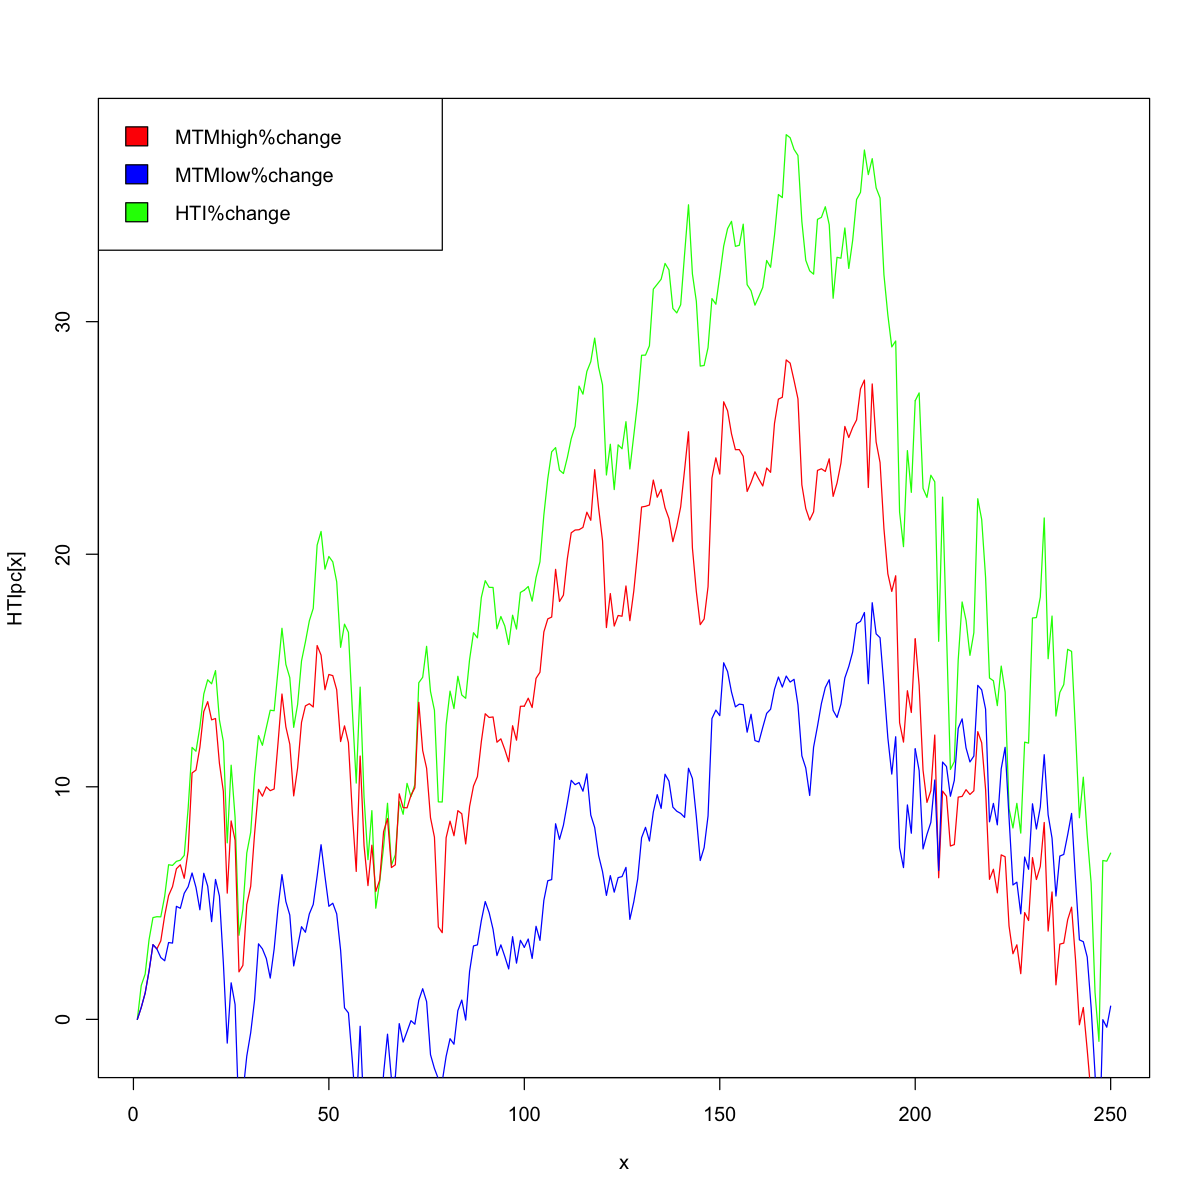

In [37]:
#HIGH TECH INDEX

Close_cols = seq(2,20,2)
HTI = list()

for(i in seq(1,nrow(universe)) ) {
    date = universe[i,"Date"]
    HTI[date] = rowMeans(universe[i,Close_cols])
}

#change lists to percentage change in regards to '2018-01-02'
pHTI = function(todayval){
    percentchange = ( (todayval - 314.2981014) / 314.2981014) * 100
    percentchange
}

pMTM_low = function(todayval){
    percentchange = ( (todayval - 4999999.995223) / 4999999.995223) * 100
    percentchange
}

pMTM_high = function(todayval){
    percentchange = ( (todayval - 4999999.995223) / 4999999.995223) * 100
    percentchange
}

HTIpc = lapply(HTI, pHTI)
MTM_lowpc = lapply(MTM_low, pMTM_low)
MTM_highpc = lapply(MTM_high, pMTM_high)

#plot curves on same graph
x = seq(1:250)
plot(x,HTIpc[x],type = "l", col="green")
lines(x, MTM_highpc[x],col = "red" )
lines(x,MTM_lowpc[x], col="blue")
legend("topleft", c("MTMhigh%change","MTMlow%change","HTI%change"),
fill=c("red","blue","green"))

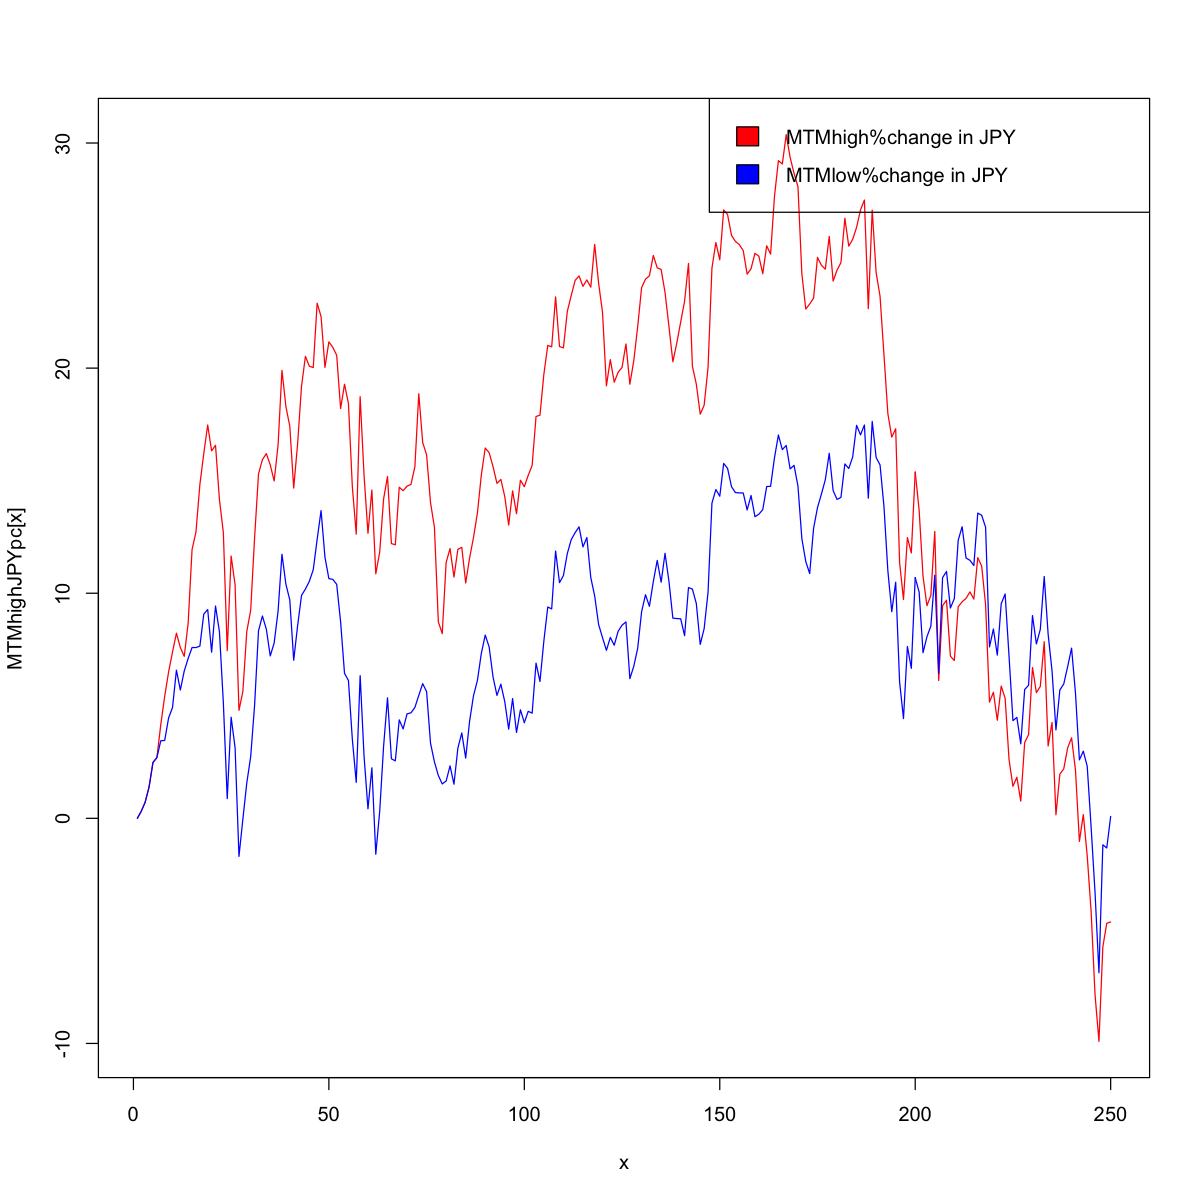

In [31]:
#USD/JPY

USDtoJPY = read.csv('./USDtoJPY.csv')
# head(USDtoJPY)
# head(MTM_low)
# head(MTM_high)

MTMlowJPY = list()
MTMhighJPY = list()


#convert MTM series from USD to JPY
i = 1
for( date in seq( 1,nrow(USDtoJPY) ) ){
    
    if( toString( USDtoJPY[date, 'Date'] )  == toString( names(MTM_low)[i] ) ){
        MTMlowJPY[ names(MTM_low)[i] ] = MTM_low[[i]] / USDtoJPY$Close[i]
        MTMhighJPY[ names(MTM_low)[i] ] = MTM_high[[i]] / USDtoJPY$Close[i]
        i = i + 1
    }
    
}

# head(MTMlowJPY)
# head(MTMhighJPY)

#convert MTM series in JPY to daily percent changes
pMTMlowJPY = function(todayval){
    percentchange = ( (todayval - 44529.5453107984) / 44529.5453107984) * 100
    percentchange
}

pMTMhighJPY = function(todayval){
    percentchange = ( (todayval - 44529.5453107984) / 44529.5453107984) * 100
    percentchange
}

MTMlowJPYpc = lapply(MTMlowJPY, pMTMlowJPY)
MTMhighJPYpc = lapply(MTMhighJPY, pMTMhighJPY)


#plot curves on same graph
set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }


set_plot_dimensions(10, 10)
x = seq(1:250)
plot(x, MTMhighJPYpc[x], type = 'l',col = "red" )
lines(x,MTMlowJPYpc[x], col="blue")
legend("topright",
c("MTMhigh%change in JPY", "MTMlow%change in JPY"),
fill=c("red","blue"))


In [14]:
#Find ideal number of days to rebalance low

## REBALANCE LOW

MTMs = list()

for(days in seq(1,250)){


    portfolio = 5000000
    MTM_low = list()
    Close_cols = seq(2,20,2)
    AdjClose_cols = seq(3,21,2)
    numShares = rep(0,5)
    pricesforshares = rep(0,5)
    cash = 0


    # INITIAL SETUP

    #split portfolio into 5 equal parts
        five_way_split = round( portfolio / 5, digits = 2)

        #find 5 minimum close priced stocks
        min_stocks = t( apply(universe[1,Close_cols],1,sort) )
        pricesforshares = min_stocks[1:5]
        stock_names = colnames(min_stocks)[1:5]


        # buy 5 minimum close priced stocks
        numShares = floor( five_way_split / pricesforshares )
        cash = round( sum( five_way_split - (numShares*pricesforshares) ), digits = 2)

        #calculate MTM for day 1
        MTM_low[[ universe[1,1] ]] = cash + sum( numShares*pricesforshares)


    # END INITIAL SETUP

    for( j in seq(2,nrow(universe))){

        #check dividends on days we are not selling/buying stock; add to cash

        #get needed dividends list
                divs_needed = list()
                for(name in stock_names){
                    for(name2 in names(Dividends)){
                        if(str_contains(name, name2) ){
                            divs_needed[[name2]] = Dividends[[name2]]
                        }
                    }
                }

        #calculate dividends earned
                divs_earned = 0
                x = 1
                for(dividend in divs_needed){ 

                    #test this line of code
                    dates = dividend$Date
                    if(any(dates == universe[j,1])){
                        index = match(universe[j,1], dates)
                        divs_earned = divs_earned + dividend[index,"Dividend"]*numShares[x]
                    }
                    x = x + 1
                }
        cash = cash + divs_earned

        #calculate todays prices for each stock

            vec = vector()
            for(name in stock_names){
                for(name3 in names(universe[,Close_cols]) ){
                    if(str_contains(name, name3) ){
                        vec <- append(vec, universe[j,name3])
                    }
                }
            }
            pricesforshares = vec[1:5]
        
        
        #Calculate MTM
        MTM_low[[ universe[j,1] ]] = cash + sum( numShares*pricesforshares)



        #EVERY x biz days rebalance portfolio    
        if(j %in% seq(1,nrow(universe),days)){
            i = j

          #Sell Stock      
            portfolio = cash + sum( numShares*pricesforshares)


        #Buy Stocks

            five_way_split = round( portfolio / 5, digits = 2)

            #find 5 minimum close priced stocks
            # min_stocks = t( apply(universe[i,AdjClose_cols],1,sort) )
            #pricesforshares = min_stocks[1:5]

            percentchanges = ( (universe[i, AdjClose_cols] - universe[i-days, AdjClose_cols]) / universe[i-days , AdjClose_cols] ) * 100
            y = t( apply(percentchanges,1,order) )
            z = AdjClose_cols[y] - 1 # get close columns indicies in order of smallest to greatest percentage change
            min_stocks = data.matrix( universe[i, z] )
            pricesforshares = min_stocks[1:5]
            stock_names = colnames(min_stocks)[1:5]

            # buy 5 minimum close priced stocks
            numShares = floor( five_way_split / pricesforshares )
            cash = round( sum( five_way_split - (numShares*pricesforshares) ), digits = 2)


        #calculate MTM
            MTM_low[[ universe[i,1] ]] = cash + sum( numShares*pricesforshares)

      }
    }

    MTMs[days] = MTM_low[['2018-12-28']]
}

 w  = which.max(MTMs)
print(w)


[1] 8


In [19]:
#Find ideal number of days to rebalance high

MTMs = list()

for(days in seq(1,250)){


    portfolio = 5000000
    MTM_low = list()
    Close_cols = seq(2,20,2)
    AdjClose_cols = seq(3,21,2)
    numShares = rep(0,5)
    pricesforshares = rep(0,5)
    cash = 0


    # INITIAL SETUP

    #split portfolio into 5 equal parts
        five_way_split = round( portfolio / 5, digits = 2)

        #find 5 minimum close priced stocks
        min_stocks = t( apply(universe[1,Close_cols],1,sort) )
        pricesforshares = min_stocks[1:5]
        stock_names = colnames(min_stocks)[1:5]


        # buy 5 minimum close priced stocks
        numShares = floor( five_way_split / pricesforshares )
        cash = round( sum( five_way_split - (numShares*pricesforshares) ), digits = 2)

        #calculate MTM for day 1
        MTM_low[[ universe[1,1] ]] = cash + sum( numShares*pricesforshares)


    # END INITIAL SETUP

    for( j in seq(2,nrow(universe))){

        #check dividends on days we are not selling/buying stock; add to cash

        #get needed dividends list
                divs_needed = list()
                for(name in stock_names){
                    for(name2 in names(Dividends)){
                        if(str_contains(name, name2) ){
                            divs_needed[[name2]] = Dividends[[name2]]
                        }
                    }
                }

        #calculate dividends earned
                divs_earned = 0
                x = 1
                for(dividend in divs_needed){ 

                    #test this line of code
                    dates = dividend$Date
                    if(any(dates == universe[j,1])){
                        index = match(universe[j,1], dates)
                        divs_earned = divs_earned + dividend[index,"Dividend"]*numShares[x]
                    }
                    x = x + 1
                }
        cash = cash + divs_earned


        #calculate todays prices for each stock
    
            vec = vector()
            for(name in stock_names){
                for(name3 in names(universe[,Close_cols]) ){
                    if(str_contains(name, name3) ){
                        vec <- append(vec, universe[j,name3])
                    }
                }
            }
            pricesforshares = vec[1:5]
        
        #Calculate MTM
        MTM_low[[ universe[j,1] ]] = cash + sum( numShares*pricesforshares)



        #EVERY x biz days rebalance portfolio    
        if(j %in% seq(1,nrow(universe),days)){
            i = j

          #Sell Stock      
            portfolio = cash + sum( numShares*pricesforshares)


        #Buy Stocks

            five_way_split = round( portfolio / 5, digits = 2)

            #find 5 minimum close priced stocks
            # min_stocks = t( apply(universe[i,AdjClose_cols],1,sort) )
            #pricesforshares = min_stocks[1:5]

            percentchanges = ( (universe[i, AdjClose_cols] - universe[i-days, AdjClose_cols]) / universe[i-days , AdjClose_cols] ) * 100
            y = t( apply(percentchanges,1,order) )
            z = AdjClose_cols[y] - 1 # get close columns indicies in order of smallest to greatest percentage change
            min_stocks = data.matrix( universe[i, z] )
            pricesforshares = min_stocks[6:10]
            stock_names = colnames(min_stocks)[6:10]

            # buy 5 minimum close priced stocks
            numShares = floor( five_way_split / pricesforshares )
            cash = round( sum( five_way_split - (numShares*pricesforshares) ), digits = 2)


        #calculate MTM
            MTM_low[[ universe[i,1] ]] = cash + sum( numShares*pricesforshares)

      }
    }

    MTMs[days] = MTM_low[['2018-12-28']]
}

 w  = which.max(MTMs)
print(w)

[1] 12
